<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/main/FCNN_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Don't do anything here. It's just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("üöÄ Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

üöÄ Cloning the repository...
Repository is ready to use at: /content/AI-Lab-Project


In [2]:
# Using supporting files (now as .ipynb and later .py)

!pip install import-ipynb
import import_ipynb
from team_24_data_preprocessing import *
from team_24_supervised_learning import *

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project
Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter


from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import train_test_split

In [6]:
import os
from datetime import datetime

def save_plot(filename, folder="plots", dpi=300):
    os.makedirs(folder, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    path = os.path.join(folder, f"{filename}_{timestamp}.png")
    plt.savefig(path, dpi=dpi, bbox_inches='tight')
    print(f"‚úÖ Saved: {path}")


In [541]:
df = pd.read_csv("24.csv")

In [7]:

def select_high_corr_features(df_train, df_valid, df_test, target_col="Hazardous", top_n=3):
    df_train_temp = df_train.copy()
    df_train_temp[target_col] = df_train_temp[target_col].astype(int)

    df_train_numeric = df_train_temp.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])

    corr_values = df_train_numeric.corr()[target_col].abs().sort_values(ascending=False)

    selected_features = corr_values.drop(index=target_col).head(top_n).index.tolist()

    return df_train[selected_features + [target_col]], df_valid[selected_features + [target_col]], df_test[selected_features + [target_col]]

In [8]:

def x_y_separation(df_train, df_valid, df_test, target_column="Hazardous"):
  X_train = df_train.drop(columns=[target_column])
  y_train = df_train[target_column]

  X_valid = df_valid.drop(columns=[target_column])
  y_valid = df_valid[target_column]

  X_test = df_test.drop(columns=[target_column])
  y_test = df_test[target_column]

  return X_train, y_train, X_valid, y_valid, X_test, y_test

In [9]:
def remove_outliers_zscore(df_train, df_valid, df_test, z_score_threshold = 3):

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_train_non_numeric = df_train.select_dtypes(exclude=['number'])

  z_scores = df_train_numeric.apply(zscore)
  df_z = df_train_numeric[(z_scores.abs() < z_score_threshold).all(axis=1)]  # Remove rows with Z-score >  z_score_threshold in any column
  df_train_cleaned = pd.concat([df_z, df_train_non_numeric.loc[df_z.index]], axis=1)

  return df_train_cleaned, df_valid, df_test


In [10]:
def label_encode_categorical(df_train, df_valid, df_test):

  categorical_cols = df_train.select_dtypes(include=['object']).columns
  label_encoders = {}

  for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_train[col] = label_encoders[col].fit_transform(df_train[col])

    # Replace -1 with the most frequent value or handle it as nan
    most_frequent_value = df_train[col].mode()[0]
    df_valid[col] = df_valid[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else most_frequent_value) # change on this line
    df_test[col] = df_test[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else most_frequent_value) # change on this line

  df_valid = df_valid[df_train.columns]
  df_test = df_test[df_train.columns]

  return df_train, df_valid, df_test

In [11]:
def standardize_data(df_train_orig, df_valid_orig, df_test_orig):
  df_train = df_train_orig.copy()
  df_valid = df_valid_orig.copy()
  df_test = df_test_orig.copy()
  scaler = StandardScaler()

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_test_numeric = df_test.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_valid_numeric = df_valid.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])

  # Standardization
  df_train[df_train_numeric.columns] = scaler.fit_transform(df_train_numeric)
  df_test[df_test_numeric.columns] = scaler.transform(df_test_numeric)
  df_valid[df_valid_numeric.columns] = scaler.transform(df_valid_numeric)

  return df_train, df_valid, df_test

In [12]:
def normalize_date_features(df, month_cols, year_cols):
  for col in month_cols:
    if col in df.columns:
      df[col] = (df[col] - 1) / (12 - 1)

  for col in year_cols:
    if col in df.columns:
      df[col] = (df[col] - 1900) / (2100 - 1900)

  return df

In [13]:
def numeric_conversion(df_orig):
  df = df_orig.copy()

  # Dropping 'Equinox' and 'Orbiting Body'
  df.drop(columns=['Equinox', 'Orbiting Body'], errors='ignore', inplace=True)

  # Converting COLUMNS to datetime
  df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])
  df['Close Approach Year'] = df['Close Approach Date'].dt.year
  df['Close Approach Month'] = df['Close Approach Date'].dt.month

  df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])
  df['Orbit Determination Year'] = df['Orbit Determination Date'].dt.year
  df['Orbit Determination Month'] = df['Orbit Determination Date'].dt.month

  # Encoding 'Hazardous' column
  df['Hazardous'] = df['Hazardous'].astype(int)

  df = df.drop(columns=["Close Approach Date", "Orbit Determination Date"])
  return df

In [14]:
def feature_extraction(df_train, df_valid, df_test):
  df_train = numeric_conversion(df_train)
  df_valid = numeric_conversion(df_valid)
  df_test = numeric_conversion(df_test)

  month_cols = ['Close Approach Month', 'Orbit Determination Month']
  year_cols = ['Close Approach Year', 'Orbit Determination Year']

  # Normalize date features
  df_train = normalize_date_features(df_train, month_cols, year_cols)
  df_valid = normalize_date_features(df_valid, month_cols, year_cols)
  df_test = normalize_date_features(df_test, month_cols, year_cols)

  return df_train, df_valid, df_test

In [15]:
def remove_highly_correlated(df_train, df_valid, df_test, high_corr_threshold = 0.99):

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])

  high_corr_pairs = set()
  correlation_matrix = df_train_numeric.corr()

  for i in range(len(correlation_matrix.columns)):
    for j in range(i): # Lower triangular matrix
      if abs(correlation_matrix.iloc[i, j]) >= high_corr_threshold:
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        high_corr_pairs.add((col1, col2))

  columns_to_drop = {col2 for col1, col2 in high_corr_pairs}

  df_train_reduced = df_train.drop(columns=columns_to_drop)
  df_valid_reduced = df_valid.drop(columns=columns_to_drop)
  df_test_reduced = df_test.drop(columns=columns_to_drop)

  return df_train_reduced, df_valid_reduced, df_test_reduced

In [16]:
def remove_outliers_iqr(df_train, df_valid, df_test):

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_train_non_numeric = df_train.select_dtypes(exclude=['number'])

  Q1 = df_train_numeric.quantile(0.25)
  Q3 = df_train_numeric.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Removing outliers
  df_iqr = df_train_numeric[~((df_train_numeric < lower_bound) | (df_train_numeric > upper_bound)).any(axis=1)]
  df_train_cleaned = pd.concat([df_iqr, df_train_non_numeric.loc[df_iqr.index]], axis=1)

  return df_train_cleaned, df_valid, df_test


In [17]:
def perform_pca(df_train, df_valid, df_test, target_col="Hazardous", n_components=11):

  # Split features & target
  X_train = df_train.drop(columns=[target_col])
  X_valid = df_valid.drop(columns=[target_col])
  X_test  = df_test.drop(columns=[target_col])

  y_train = df_train[target_col].reset_index(drop=True)
  y_valid = df_valid[target_col].reset_index(drop=True)
  y_test  = df_test[target_col].reset_index(drop=True)

  # PCA
  pca = PCA(n_components=n_components)
  pca.fit(X_train)

  X_train_pca = pd.DataFrame(pca.transform(X_train), columns=[f'PC{i+1}' for i in range(n_components)])
  X_valid_pca = pd.DataFrame(pca.transform(X_valid), columns=[f'PC{i+1}' for i in range(n_components)])
  X_test_pca  = pd.DataFrame(pca.transform(X_test),  columns=[f'PC{i+1}' for i in range(n_components)])

  # Add target back
  df_train_pca = pd.concat([X_train_pca, y_train], axis=1)
  df_valid_pca = pd.concat([X_valid_pca, y_valid], axis=1)
  df_test_pca  = pd.concat([X_test_pca,  y_test],  axis=1)

  return df_train_pca, df_valid_pca, df_test_pca

In [18]:
def normalize_minmax(df_train_orig, df_valid_orig, df_test_orig):
  df_train = df_train_orig.copy()
  df_valid = df_valid_orig.copy()
  df_test = df_test_orig.copy()
  scaler = MinMaxScaler()

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_test_numeric = df_test.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_valid_numeric = df_valid.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])

  # Normalization
  df_train[df_train_numeric.columns] = scaler.fit_transform(df_train_numeric)
  df_test[df_test_numeric.columns] = scaler.transform(df_test_numeric)
  df_valid[df_valid_numeric.columns] = scaler.transform(df_valid_numeric)

  return df_train, df_valid, df_test

In [53]:

def data_random_forest(df):
  df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)
  df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)
  df_train.reset_index(drop=True, inplace=True)
  df_valid.reset_index(drop=True, inplace=True)
  df_test.reset_index(drop=True, inplace=True)

  df_train, df_valid, df_test = remove_outliers_iqr(df_train, df_valid, df_test)
  df_train, df_valid, df_test = label_encode_categorical(df_train, df_valid, df_test)
  df_train, df_valid, df_test = normalize_minmax(df_train, df_valid, df_test)
  df_train, df_valid, df_test = remove_highly_correlated(df_train, df_valid, df_test)

  return df_train, df_valid, df_test

In [54]:
df_train, df_valid, df_test = data_random_forest(df)

In [55]:
def train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous", n_estimators=100, random_state=42):

    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

    X_train_rf = np.array(X_train)
    X_valid_rf = np.array(X_valid)
    X_test_rf = np.array(X_test)

    y_train_rf = np.array(y_train)
    y_valid_rf = np.array(y_valid)
    y_test_rf = np.array(y_test)

    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    random_forest.fit(X_train_rf, y_train_rf)

    y_valid_pred_rf = random_forest.predict(X_valid_rf)
    y_test_pred_rf = random_forest.predict(X_test_rf)

    return random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf,X_test

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Model", save=False, filename="conf_matrix.png"):
    print(f"\nEvaluation Metrics for {model_name}:")

    # Determine actual labels
    labels = np.unique(np.concatenate((y_true, y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")

    if save:
        plt.savefig(filename)

    plt.show()

    # Use weighted for robustness
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0, average='weighted')
    recall = recall_score(y_true, y_pred, zero_division=0, average='weighted')
    f1 = f1_score(y_true, y_pred, zero_division=0, average='weighted')

    print(f"\n  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

    return accuracy, precision, recall, f1


In [57]:
# df_train["Hazardous"] = df_train["Hazardous"].astype(int)
# df_valid["Hazardous"] = df_valid["Hazardous"].astype(int)
# df_test["Hazardous"] = df_test["Hazardous"].astype(int)


Evaluation Metrics for Random Forest Best Model (Validation):


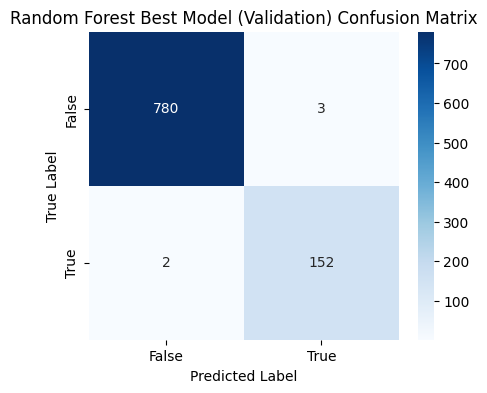


  Accuracy:  0.9947
  Precision: 0.9947
  Recall:    0.9947
  F1-score:  0.9947

Evaluation Metrics for Random Forest Best Model (Test):


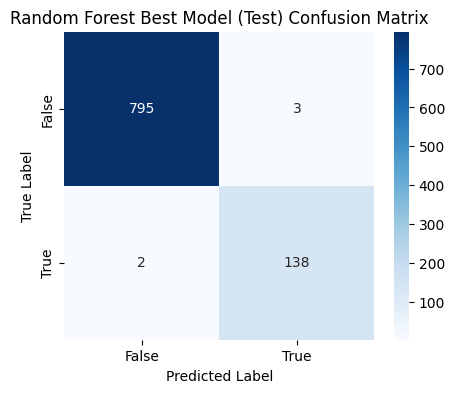


  Accuracy:  0.9947
  Precision: 0.9947
  Recall:    0.9947
  F1-score:  0.9947


(0.9946695095948828,
 0.9946895172552837,
 0.9946695095948828,
 0.9946773234531279)

In [59]:
random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf,X_test = train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous", n_estimators=100, random_state=42)
# Validation set
evaluate_model(
    y_valid_rf,
    y_valid_pred_rf,
    model_name="Random Forest Best Model (Validation)",
    save=True,
    filename="rf_validation_confusion.png"
)

# Test set
evaluate_model(
    y_test_rf,
    y_test_pred_rf,
    model_name="Random Forest Best Model (Test)",
    save=True,
    filename="rf_test_confusion.png"
)


In [36]:
def plot_distributions(df, target_column="Hazardous", features_to_plot=None, save=False):
    if features_to_plot is None:
        features_to_plot = df.drop(columns=[target_column]).select_dtypes(include=np.number).columns[:4]

    for feature in features_to_plot:
        plt.figure(figsize=(10, 4))
        sns.histplot(data=df, x=feature, hue=target_column, kde=True, element="step", stat="density", common_norm=False)
        plt.title(f"Distribution of {feature} by Hazardous Classification")
        plt.xlabel(feature)
        plt.ylabel("Density")
        plt.legend(title=target_column, labels=["Not Hazardous", "Hazardous"])
        plt.tight_layout()
        if save:
            save_plot(f"distplot_{feature}")
        plt.show()

        for other_feature in features_to_plot:
            if feature != other_feature:
                plt.figure(figsize=(6, 4))
                sns.scatterplot(data=df, x=feature, y=other_feature, hue=target_column, palette='Set2', alpha=0.7)
                plt.title(f"{feature} vs {other_feature}")
                plt.tight_layout()
                if save:
                    save_plot(f"scatter_{feature}_vs_{other_feature}")
                plt.show()


In [37]:
def plot_correlation_heatmap(df, title="Correlation Heatmap", save=False, filename=None):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    if save:
        filename = filename or "correlation_heatmap"
        save_plot(filename)
    plt.show()


In [38]:
def plot_actual_vs_predicted_bar(y_true, y_pred, title="Actual vs Predicted Counts", save=False, filename=None):
    # Convert y_true and y_pred to 1-dimensional arrays if they are not already
    y_true = y_true.ravel()  # or y_true.flatten() if y_true is a numpy array
    y_pred = y_pred.ravel()  # or y_pred.flatten() if y_pred is a numpy array

    df = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})
    counts = pd.DataFrame({
        'Actual': df['Actual'].value_counts().sort_index(),
        'Predicted': df['Predicted'].value_counts().sort_index()
    })
    counts.plot(kind='bar', figsize=(6, 4), colormap='tab10')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(ticks=[0,1], labels=["Not Hazardous", "Hazardous"], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    if save:
        filename = filename or "barplot_actual_vs_predicted"
        save_plot(filename)
    plt.show()

In [39]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_pr_curves(model, X_test, y_test, model_name="Model", save=False):
    y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    plt.title(f"{model_name} - ROC Curve", fontsize=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    if save:
        save_plot(f"roc_curve_{model_name.replace(' ', '_')}")
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color="green", lw=2)
    plt.title(f"{model_name} - Precision-Recall Curve", fontsize=14)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    if save:
        save_plot(f"precision_recall_curve_{model_name.replace(' ', '_')}")
    plt.show()


In [48]:
def plot_metrics_line(metrics_dict, model_name="Model", save=False):
    metrics_df = pd.DataFrame(metrics_dict, index=[0])
    metrics_df = metrics_df.melt(var_name='Metric', value_name='Score')

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=metrics_df, x='Metric', y='Score', marker='o', sort=False, linewidth=2, color='blue')
    plt.title(f"{model_name} - Evaluation Metrics", fontsize=14)
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    if save:
        save_plot(f"metrics_lineplot_{model_name.replace(' ', '_')}")
    plt.show()


In [49]:
def plot_actual_vs_predicted_line(y_true, y_pred, title="Actual vs Predicted", save=False, filename=None):
    plt.figure(figsize=(12, 4))
    plt.plot(y_true, label="Actual", marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label="Predicted", marker='x', linestyle='--', alpha=0.7)
    plt.title(title)
    plt.xlabel("Instance Index")
    plt.ylabel("Label")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    if save:
        filename = filename or "lineplot_actual_vs_predicted"
        save_plot(filename)
    plt.show()


In [50]:
def generate_all_plots(model, X_test, y_test, y_valid, y_pred_valid, y_test_pred, df_train, model_name="Random Forest Best Model", features_to_plot=None):
    print("\nüìä Generating and saving all plots...")

    # 1. Distributions & Scatter Plots
    plot_distributions(df_train, features_to_plot=features_to_plot, save=True)

    # 2. Correlation Heatmap
    plot_correlation_heatmap(df_train, title="Correlation Heatmap", save=True)

    # 3. Actual vs Predicted Bar
    plot_actual_vs_predicted_bar(y_valid, y_pred_valid, title="Actual vs Predicted - Validation", save=True)
    plot_actual_vs_predicted_bar(y_test, y_test_pred, title="Actual vs Predicted - Test", save=True)

    # 4. Actual vs Predicted Line
    plot_actual_vs_predicted_line(y_valid, y_pred_valid, title="Line Plot - Validation Set", save=True)
    plot_actual_vs_predicted_line(y_test, y_test_pred, title="Line Plot - Test Set", save=True)

    # # 5. ROC & Precision-Recall
    # plot_roc_pr_curves(model, np.array(X_test), y_test, model_name=model_name, save=True)

    # 6. Metrics Line Plot
    val_metrics = dict(zip(["Accuracy", "Precision", "Recall", "F1"],
                           evaluate_model(y_valid, y_pred_valid, f"{model_name} Validation")))
    plot_metrics_line(val_metrics, model_name=f"{model_name} (Validation)", save=True)

    print("All plots saved successfully.\n")


In [51]:
import os
import glob

def delete_old_plots(folder="plots", extension="png"):
    pattern = os.path.join(folder, f"*.{extension}")
    files = glob.glob(pattern)
    for file in files:
        os.remove(file)
        print(f"üóëÔ∏è Deleted: {file}")
    if not files:
        print("üìÇ No old plots found to delete.")

# Run it before generating new plots
delete_old_plots()


üóëÔ∏è Deleted: plots/lineplot_actual_vs_predicted_20250415_073132.png
üóëÔ∏è Deleted: plots/correlation_heatmap_20250415_073130.png
üóëÔ∏è Deleted: plots/barplot_actual_vs_predicted_20250415_073131.png
üóëÔ∏è Deleted: plots/scatter_Orbit ID_vs_Est Dia in Feet(max)_20250415_073128.png
üóëÔ∏è Deleted: plots/distplot_Est Dia in Feet(max)_20250415_073124.png
üóëÔ∏è Deleted: plots/distplot_Orbit ID_20250415_073126.png
üóëÔ∏è Deleted: plots/scatter_Absolute Magnitude_vs_Est Dia in Feet(max)_20250415_073122.png
üóëÔ∏è Deleted: plots/metrics_lineplot_Random_Forest_Best_Model_(Validation)_20250415_073134.png
üóëÔ∏è Deleted: plots/scatter_Orbit ID_vs_Absolute Magnitude_20250415_073127.png
üóëÔ∏è Deleted: plots/lineplot_actual_vs_predicted_20250415_073133.png
üóëÔ∏è Deleted: plots/scatter_Est Dia in Feet(max)_vs_Absolute Magnitude_20250415_073125.png
üóëÔ∏è Deleted: plots/distplot_Absolute Magnitude_20250415_073121.png
üóëÔ∏è Deleted: plots/scatter_Est Dia in Feet(max)_vs_Orbit ID_2


üìä Generating and saving all plots...
‚úÖ Saved: plots/distplot_Absolute Magnitude_20250415_073152.png


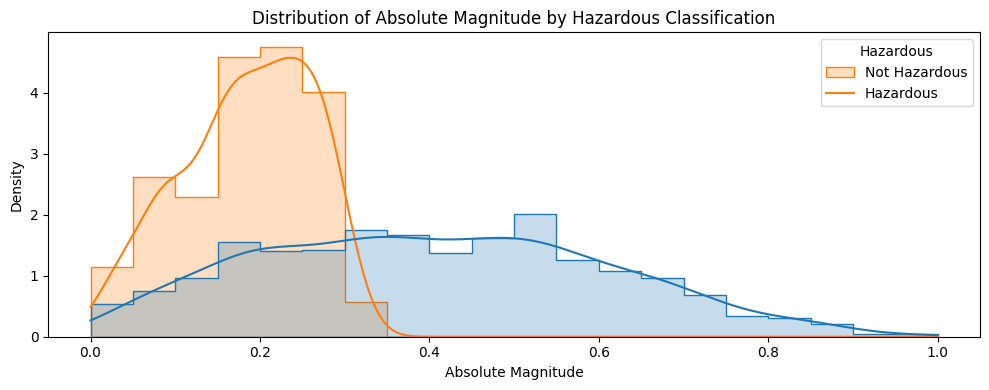

‚úÖ Saved: plots/scatter_Absolute Magnitude_vs_Est Dia in Feet(max)_20250415_073153.png


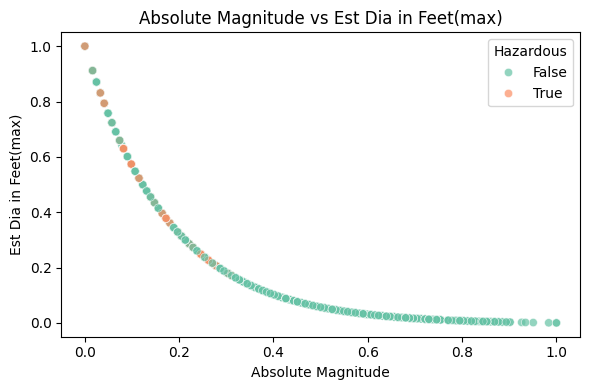

‚úÖ Saved: plots/scatter_Absolute Magnitude_vs_Orbit ID_20250415_073154.png


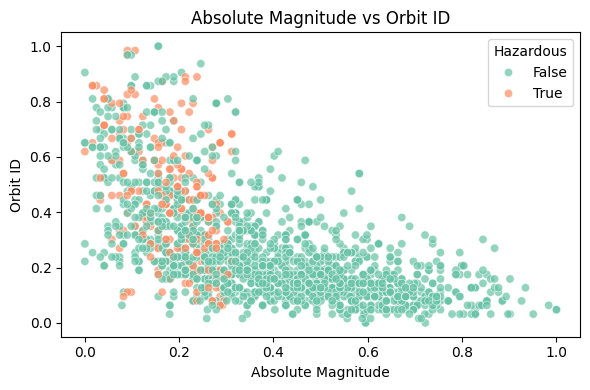

‚úÖ Saved: plots/distplot_Est Dia in Feet(max)_20250415_073155.png


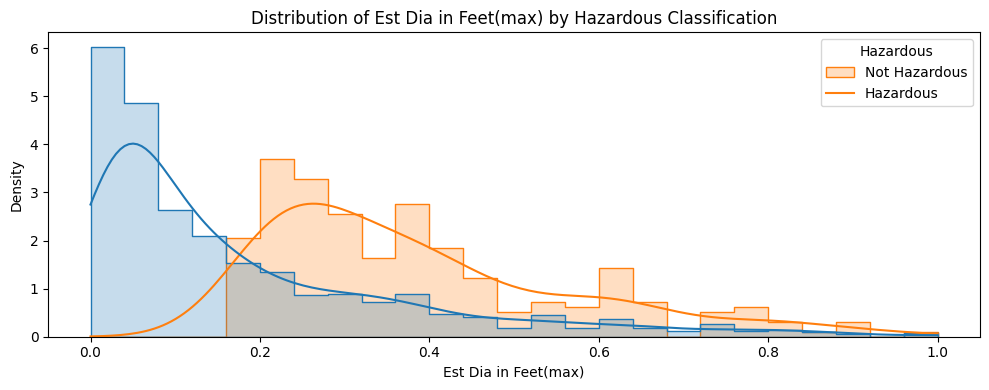

‚úÖ Saved: plots/scatter_Est Dia in Feet(max)_vs_Absolute Magnitude_20250415_073156.png


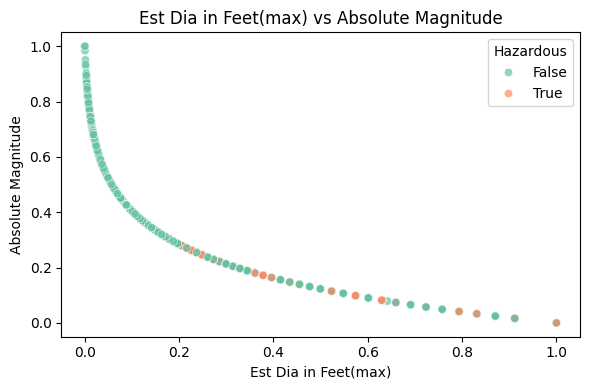

‚úÖ Saved: plots/scatter_Est Dia in Feet(max)_vs_Orbit ID_20250415_073157.png


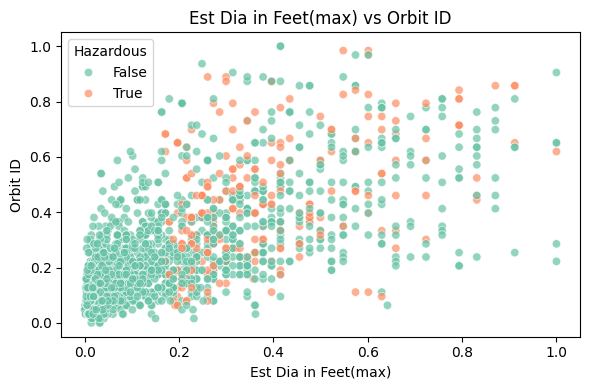

‚úÖ Saved: plots/distplot_Orbit ID_20250415_073158.png


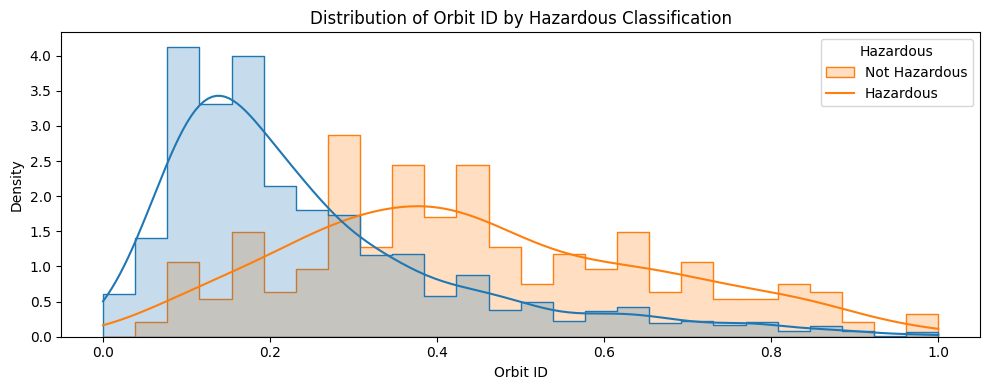

‚úÖ Saved: plots/scatter_Orbit ID_vs_Absolute Magnitude_20250415_073159.png


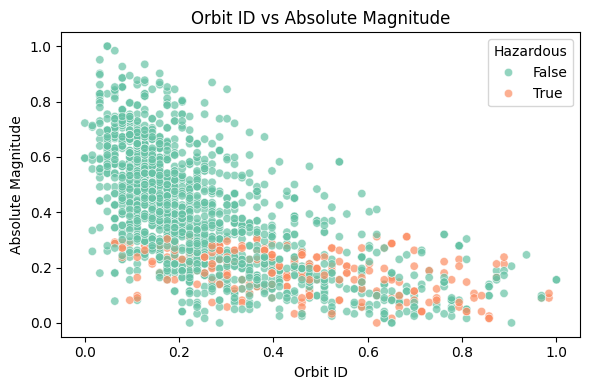

‚úÖ Saved: plots/scatter_Orbit ID_vs_Est Dia in Feet(max)_20250415_073200.png


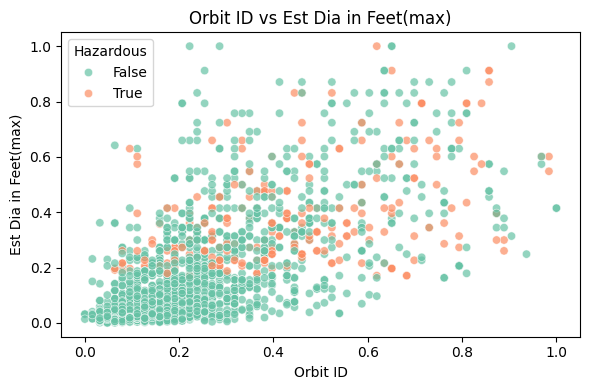

‚úÖ Saved: plots/correlation_heatmap_20250415_073200.png


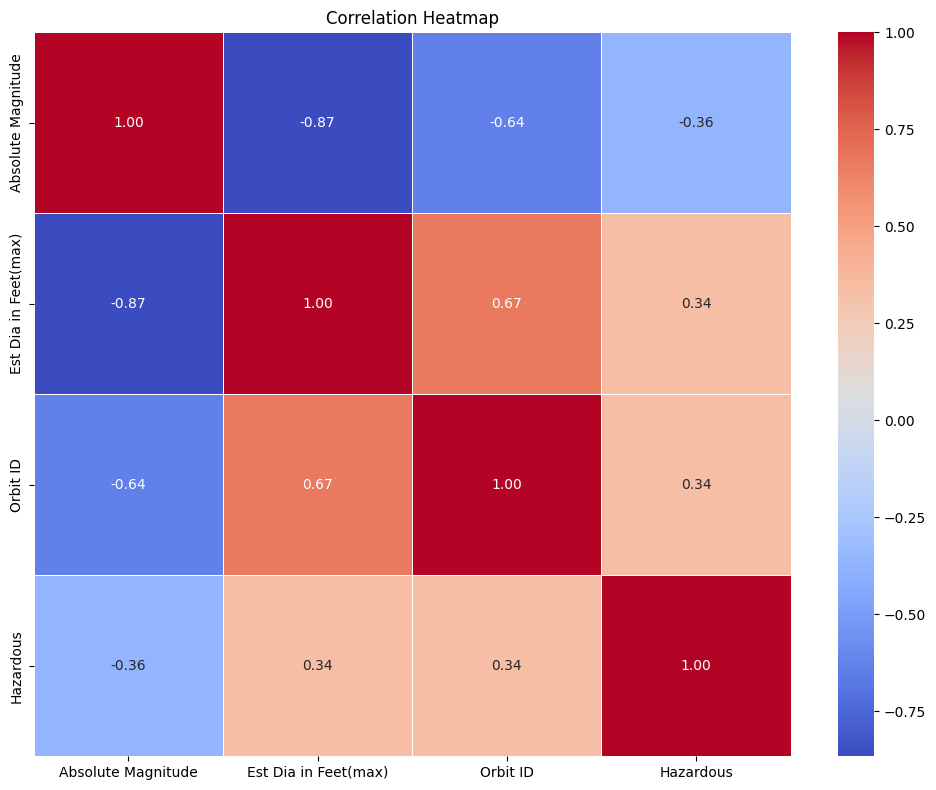

‚úÖ Saved: plots/barplot_actual_vs_predicted_20250415_073201.png


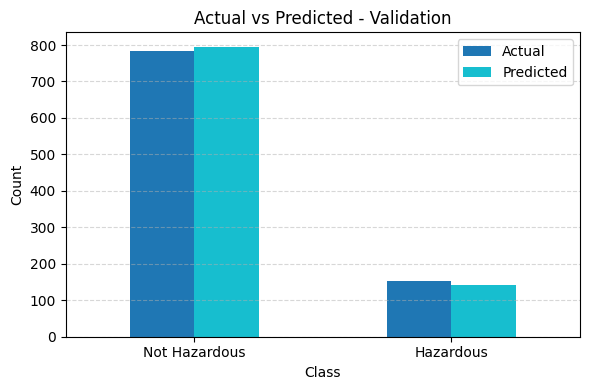

‚úÖ Saved: plots/barplot_actual_vs_predicted_20250415_073202.png


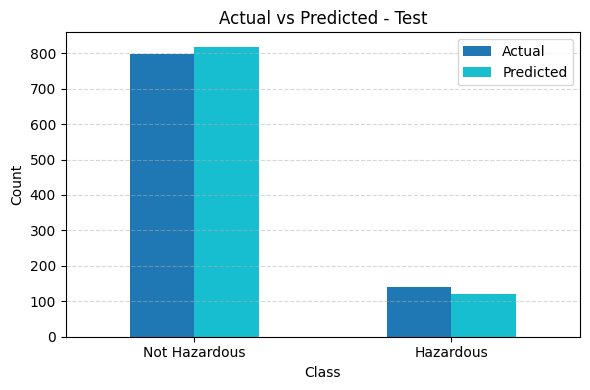

‚úÖ Saved: plots/lineplot_actual_vs_predicted_20250415_073202.png


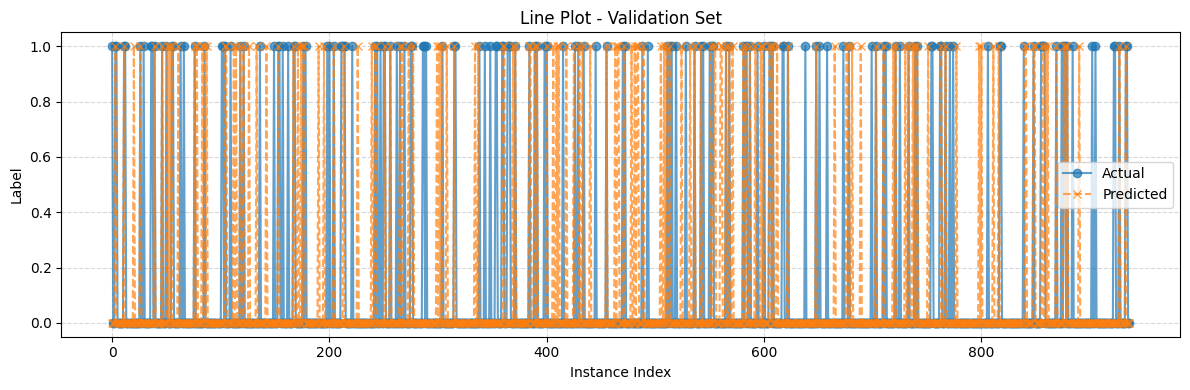

‚úÖ Saved: plots/lineplot_actual_vs_predicted_20250415_073203.png


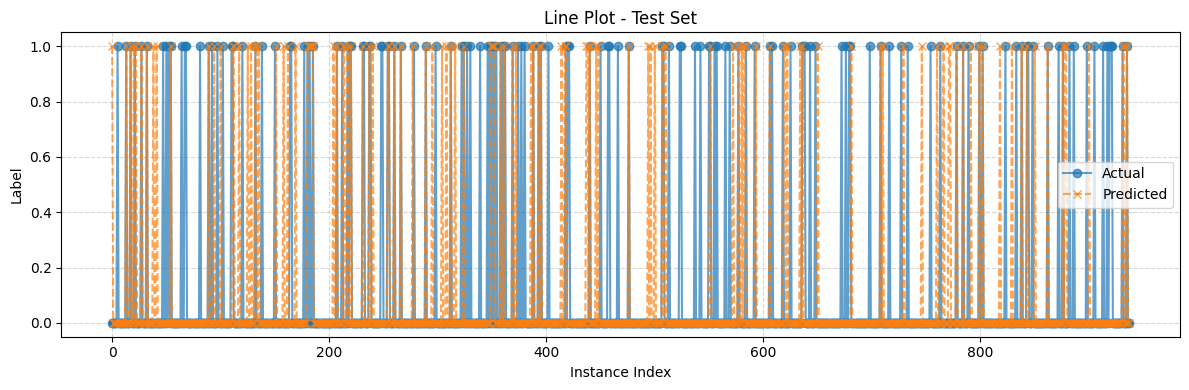


Evaluation Metrics for Random Forest Best Model Validation:


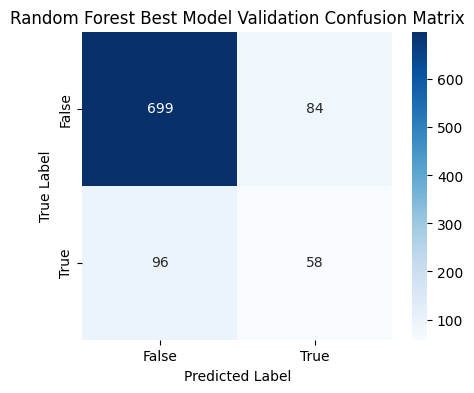


  Accuracy:  0.8079
  Precision: 0.8019
  Recall:    0.8079
  F1-score:  0.8047
‚úÖ Saved: plots/metrics_lineplot_Random_Forest_Best_Model_(Validation)_20250415_073205.png


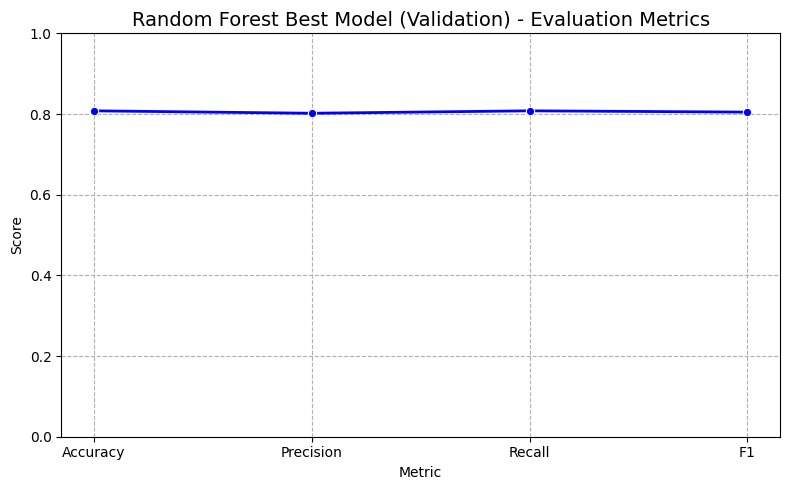

All plots saved successfully.



In [52]:
generate_all_plots(
    model=random_forest,
    X_test=X_test,
    y_test=y_test_rf,
    y_valid=y_valid_rf,
    y_pred_valid=y_valid_pred_rf,
    y_test_pred=y_test_pred_rf,
    df_train=df_train,
    model_name="Random Forest Best Model"
)